# Note

Our initial dataset contained approximately 182 million rows, with data recorded every minute. Since the goal is to compute hourly portfolio optimization, we aggregated the data by minute using the `groupby` function in Pandas. As a result, we reduced the dataset to about 1.5 million rows, which is manageable for processing.

The dataset used is located in the `data` folder. However, to make everyhting work, some data files need to be downloaded:

1. Download the SP100 data for the period 2004-2008 from the following link and insert it into the `data` folder: [SP100 Data (2004-2008)](https://drive.switch.ch/index.php/s/0X3Je6DauQRzD2r)
2. Download all folders from the [link](https://drive.google.com/drive/folders/1JWhsf7jwS9RcTxgKnULsMfPRPByhF7GO?usp=sharing) and place them in the `data` folder.


In [9]:
from utils import *

# Introduction

This Jupyter Notebook provides an overview of our project and the steps taken to achieve its objectives.

The primary goal of this project was to denoise covariance matrices. Studies in Random Matrix Theory (RMT) suggest that over 90% of the data in such matrices is noise. This high noise level leads to an underestimation of risk during portfolio optimization. 

To address this issue, we explored covariance matrix denoising techniques to achieve more accurate and precise risk estimation.

We evaluated the following three approaches:
1. The standard Minimum Variance Portfolio (MVP), comparing in-sample and out-of-sample risk estimations.
2. Correlation clipping.
3. The BAHC (Block Averaging Hierarchical Clustering) method.


## Plot moving averages

First, we plotted the moving average for the 10 selected stocks.

We focused on the last year of data (2008) and selected stocks that had complete daily data for the entire year after analyzing the dataset.


/Users/valentinaolaritei/Desktop/3_SEMESTER/FIN-525 Project/utils.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_table = pivot_table.fillna(method='bfill', axis=0).fillna(method='ffill', axis=0)


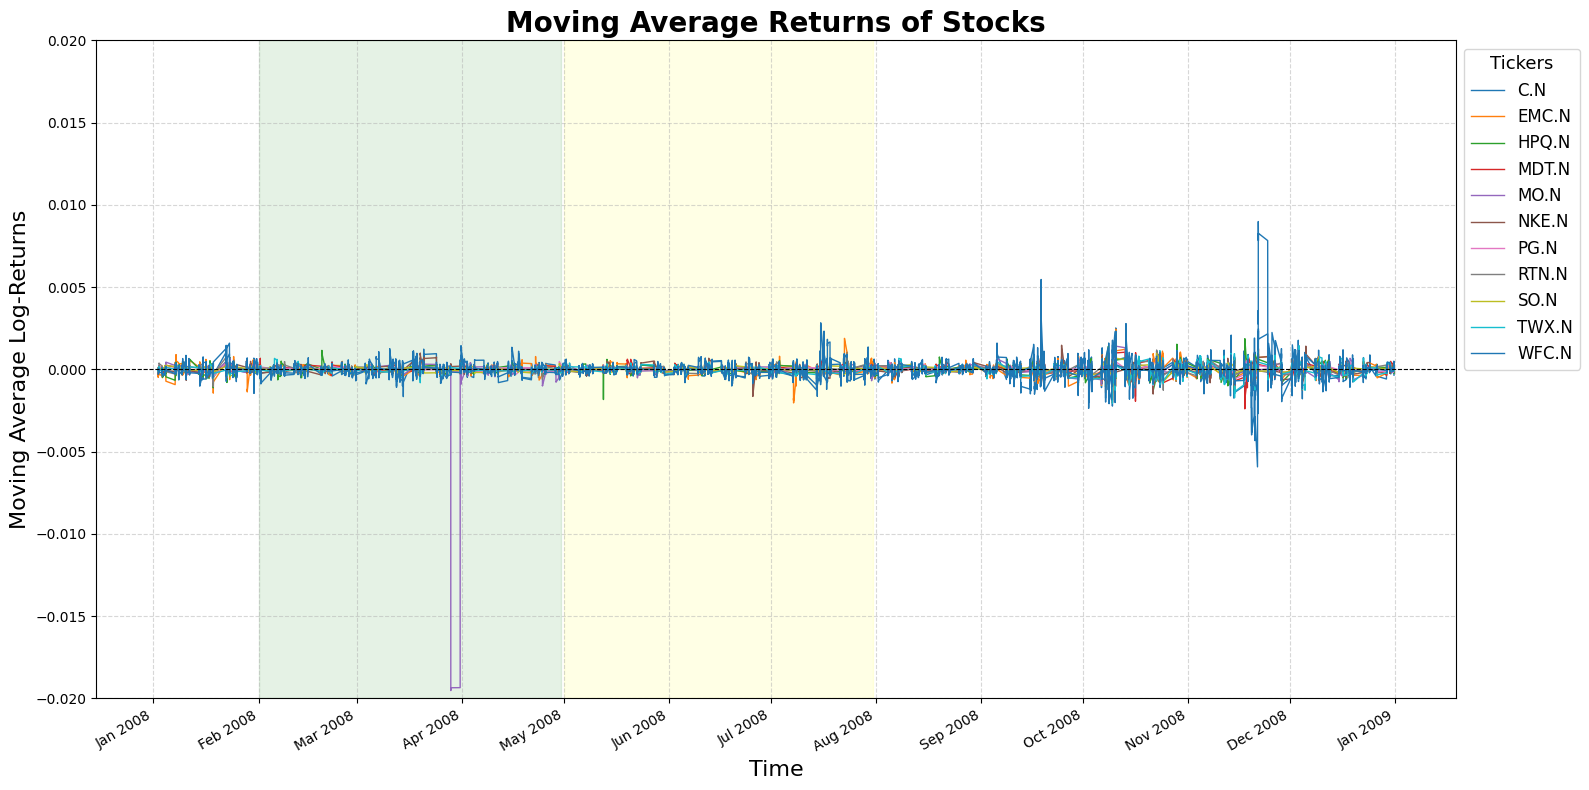

In [10]:
plot_moving_average_returns(
    parquet_file='data/clean_full_bbo_data.parquet',
    T_in=60,
    dT=5,
    in_sample_period=('2008-02-01', '2008-04-30'),
    out_sample_period=('2008-05-01', '2008-07-31')
)

## Plot risk for Covariance method

In this method, we computed the out-of-sample variance using the formula 
$$ \sigma_{out}^2 = w^{T} \Sigma_{out} w $$
where, 
$$ w^* = \frac{\Sigma^{-1} \cdot \mathbf{1}}{\mathbf{1}^T \Sigma^{-1} \mathbf{1}}$$

It is possible to observe that out-of-sample, as expected, the variance is higher than the in-sample one.

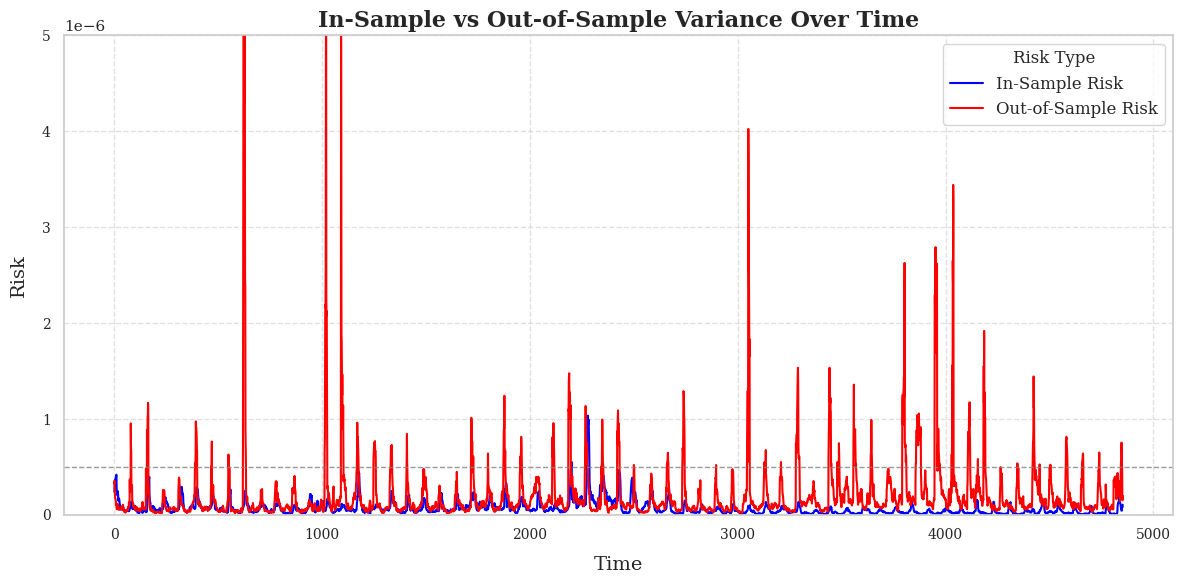

In [12]:
cov_in_sample = pd.read_csv('data/covariance_data/risks_in_sample.csv')
cov_out_sample = pd.read_csv('data/covariance_data/risks_out_sample.csv')
plot_two_risks(cov_in_sample, cov_out_sample)

## Plot risk for Correlation Clipping

In this analysis, we applied the **Marchenko-Pastour theorem** from Random Matrix Theory (RMT). Specifically, we set all eigenvalues greater than or equal to $ \lambda_+ $ to:
$$
\lambda_+ = \sigma^2 (1 - \sqrt{q})^2
$$
where $ q = \frac{N}{T} $ is the ratio of assets $ N $ to observations $ T $, and $ \sigma^2 $ is the variance. The remaining eigenvalues were set to a constant $ \delta $. More details are provided in the report.

It is also observed that the estimated out-of-sample variance is higher than the in-sample variance.


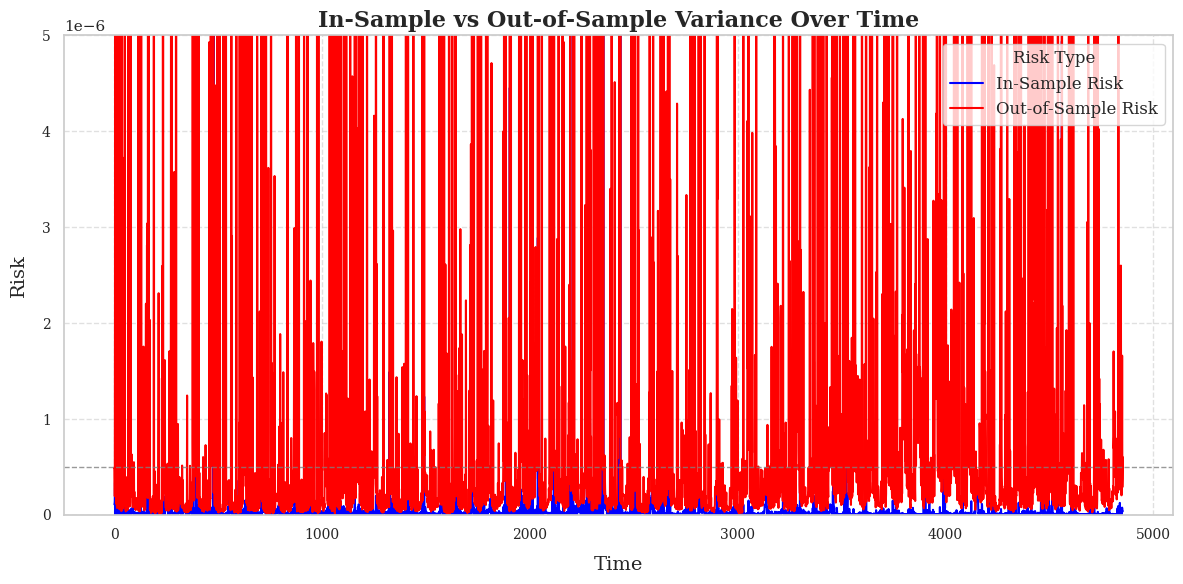

In [17]:
corr_in_sample = pd.read_csv('data/correlation_data/risks_in_sample.csv')
corr_out_sample = pd.read_csv('data/correlation_data/risk_out_sample.csv')
plot_two_risks(corr_in_sample, corr_out_sample)

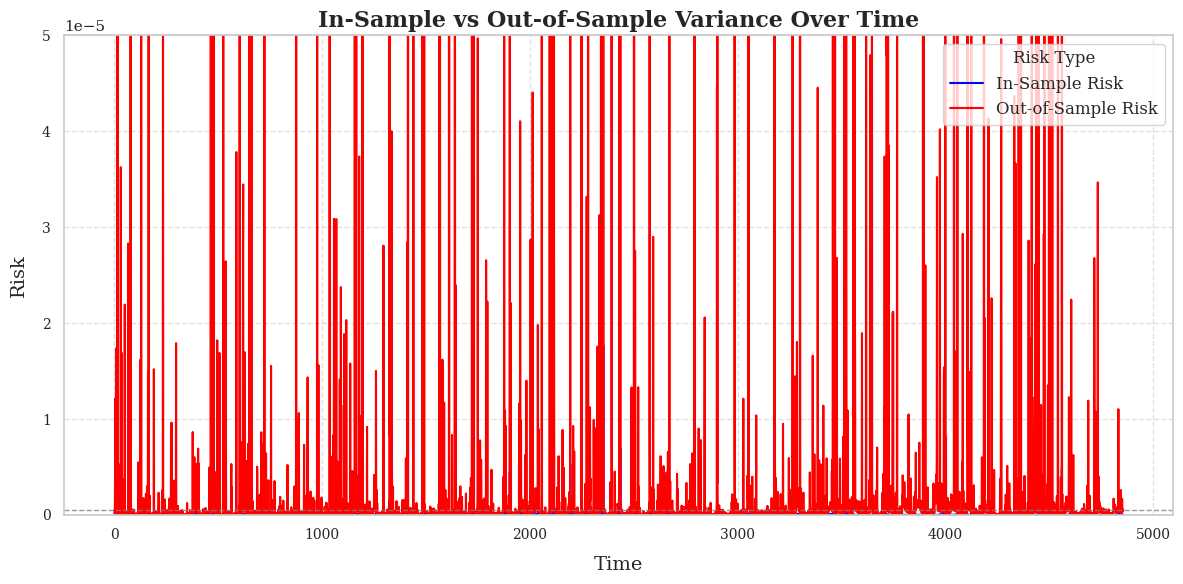

In [14]:
plot_two_risks_clipped(corr_in_sample, corr_out_sample)

## Plot risk for BAHC

In this study, we employed the Block Hierarchical (BAHC) method to estimate the covariance matrix. Using this matrix, we calculated optimal portfolio weights via the formula:

$$ w^* = \frac{\Sigma^{-1}_{BAHC} \cdot \mathbf{1}}{\mathbf{1}^T \Sigma^{-1}_{BAHC} \mathbf{1}}$$

We then computed both in-sample and out-of-sample variances. As anticipated, the out-of-sample variance exceeded the in-sample variance, revealing potential model limitations in portfolio weight estimation.

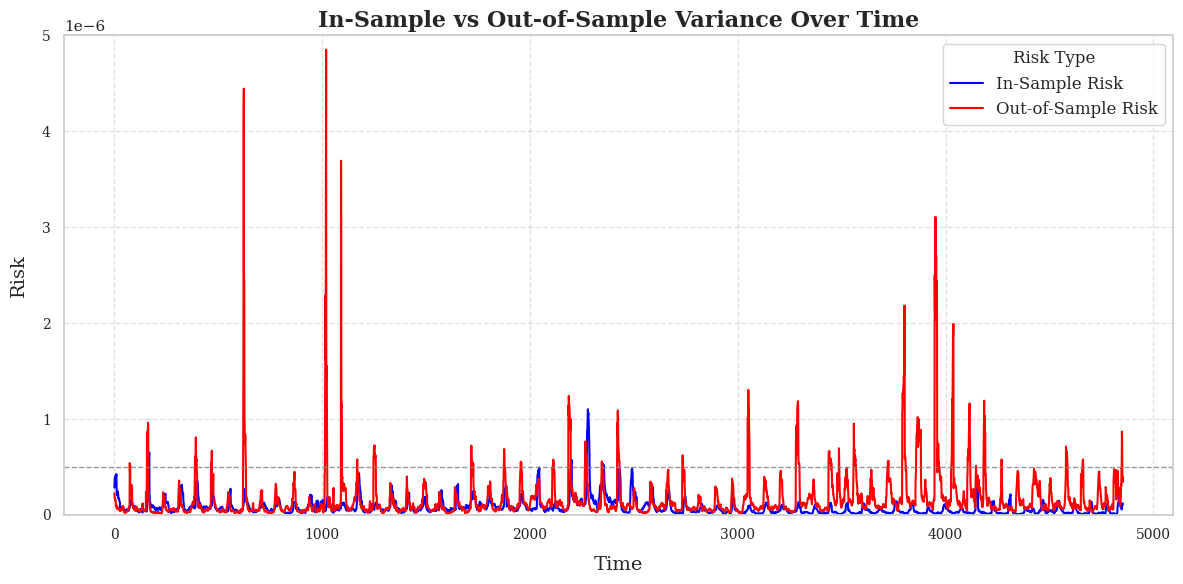

In [16]:
bahc_out_sample = pd.read_csv('data/bahc/risk_out_sample.csv')
bahc_in_sample = pd.read_csv('data/bahc/risks_in_sample.csv')
plot_two_risks(bahc_in_sample, bahc_out_sample)